**Название проекта**

Прогнозирование заказов такси.

**Описание проекта**

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

**Цель исследования**

Построить модель, которая будет прогнозировать количество заказов такси на следующий час.

**Критерии исследования**

Критерии, которые важны заказчику:
* RMSE на тестовой выборке <= 48

**Исходные данные**

Данные лежат в файле /datasets/taxi.csv.  


Признаки:
* datetime - время заказа такси

Целевой признак:
* num_orders - число заказов


<a href="#qwerty">План исследования находится в меню Table of contents</a>

<a id="qwerty"></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-загрузке-данных" data-toc-modified-id="Вывод-по-загрузке-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong>Вывод по загрузке данных</strong></a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Осмотр-данных" data-toc-modified-id="Осмотр-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Осмотр данных</a></span></li><li><span><a href="#Пропуски-в-данных" data-toc-modified-id="Пропуски-в-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски в данных</a></span></li><li><span><a href="#Анализ-аномалий-и-выбросов" data-toc-modified-id="Анализ-аномалий-и-выбросов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ аномалий и выбросов</a></span></li><li><span><a href="#Анализ-тренда" data-toc-modified-id="Анализ-тренда-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ тренда</a></span></li><li><span><a href="#Анализ-стационарности" data-toc-modified-id="Анализ-стационарности-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ стационарности</a></span></li><li><span><a href="#Вывод-по-исследовательскому-анализу-данных" data-toc-modified-id="Вывод-по-исследовательскому-анализу-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><strong>Вывод по исследовательскому анализу данных</strong></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Вывод-по-подготовке-данных" data-toc-modified-id="Вывод-по-подготовке-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><strong>Вывод по подготовке данных</strong></a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Dummy-Regressor" data-toc-modified-id="Dummy-Regressor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><strong>Dummy Regressor</strong></a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><strong>LinearRegression</strong></a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><strong>CatBoostRegressor</strong></a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Сравнение моделей</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

### Загрузка данных

In [1]:
!pip install scikit-learn==1.3.0 -q
!pip install lightgbm -q
!pip install catboost -q

In [2]:
import warnings
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

warnings.filterwarnings('ignore')

In [3]:
local_path = '/datasets/taxi.csv'
url = 'https://code.s3.yandex.net/datasets/taxi.csv'

if os.path.exists(local_path):
    df = pd.read_csv(local_path, parse_dates=[0], index_col=[0])
    print("Данные загружены из локального файла")
else:
    df = pd.read_csv(url, parse_dates=[0], index_col=[0])
    print("Данные загружены из интернета")

print(f"Размер данных: {df.shape}")
display(df.info())
df.head()

Данные загружены из локального файла
Размер данных: (26496, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Мы хотим прогнозировать количество заказов на следующий час, поэтому для дальнейшей работы сделаем ресемплирование данных по каждому часу. Получим количество заказов за каждый час.

In [4]:
df = df.resample('1H').sum()

In [5]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


#### **Вывод по загрузке данных**

Данные успешно загружены. Типы данных корректны.

С помощью параметров **parse_dates** и **index_col** столбец **datetime** был приведен к нужному типу datetime64 и был сделан индеком датафрейма. Также, датафрейм был отсортирован по возрастанию даты.

Также было выполнено ресемплирование данных по каждому часу.

### Исследовательский анализ данных

В этом разделе:

1. Более подробно осмотрим данные
2. Проверим наличие пропусков в данных
3. Исследуем данные на аномалии и выбросы, построим визуализации

#### Осмотр данных

In [6]:
print(df.index.min())
print(df.index.max())

2018-03-01 00:00:00
2018-08-31 23:00:00


Данные в нашем датафрейме указаны с 1 марта 2018 года по 31 августа 2018 года.

In [7]:
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Можно сделать такие выводы:
* Среднее количество заказов в час - 84
* Медианное количество заказов в час - 45
* Минимально возможное количество заказов в час - 0
* Максимально возможное количество заказов в час - 462

#### Пропуски в данных

In [8]:
df.isna().sum()

num_orders    0
dtype: int64

In [9]:
df.index.isna().sum()

0

Пропуски в данных отсутсвуют.

#### Анализ аномалий и выбросов

In [10]:
# Функция для построения графиков количественного признака
def grafics(df_col, label_x2, label_y2, title):
    # Создание фигуры и осей
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=14, y=1.05)  # Общий заголовок
    # Гистограмма
    axs[0].hist(df_col,edgecolor='black', bins=30, alpha=0.7)
    axs[0].set_title('Гистограмма', fontsize=12)
    axs[0].set_xlabel(label_x2, fontsize=10)
    axs[0].set_ylabel(label_y2, fontsize=10)
    axs[0].grid(linestyle='--', alpha=0.5)
    # Диаграмма размаха
    sns.boxplot(
        x=df_col, 
        ax=axs[1], 
        color='lightgreen', 
        width=0.4,
        linewidth=1.5,
        flierprops=dict(
            marker='o', 
            markerfacecolor='red', 
            markersize=6,
            markeredgecolor='black'
        )
    )
    axs[1].set_title('Диаграмма размаха (Boxplot)', fontsize=12)
    axs[1].set_xlabel(label_x2, fontsize=10)
    
    
    plt.tight_layout()
    plt.show()

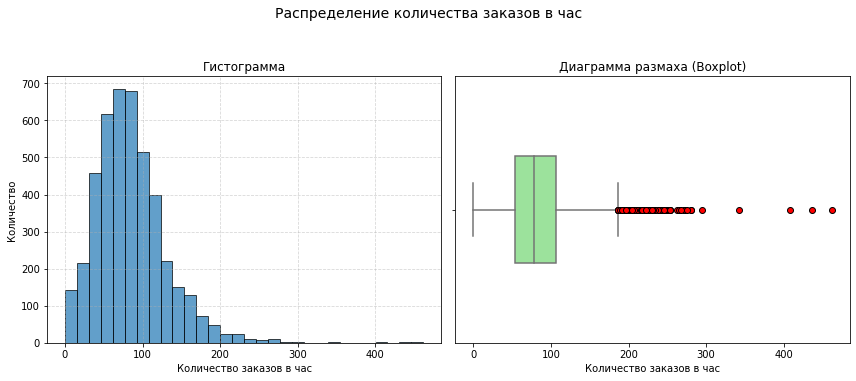

In [11]:
grafics(df['num_orders'], 'Количество заказов в час', 'Количество', 
       'Распределение количества заказов в час')

Чаще всего количество заказов в час составляет 60-100, однако бывают часы, когда заказов значительно больше.

Посмотрим отдельно на данные, когда количество заказов в час которых превышает - 250

In [12]:
df[df['num_orders'] > 250]

,num_orders
datetime,
2018-04-24 00:00:00,253
2018-07-19 10:00:00,251
2018-08-13 01:00:00,273
2018-08-13 02:00:00,437
2018-08-18 00:00:00,281
2018-08-18 02:00:00,254
2018-08-20 01:00:00,272
2018-08-20 02:00:00,462
2018-08-20 04:00:00,273


Видно, что большая часть таких "выбросов" происходила в самом последнем месяце наблюдений, в августе. Возможно, тренд количества заказов такси восходящий, поэтому в августе мы видим большую часть "выбросов".

#### Анализ тренда

Посмотрим на тренд:

In [13]:
decomposed = seasonal_decompose(df)

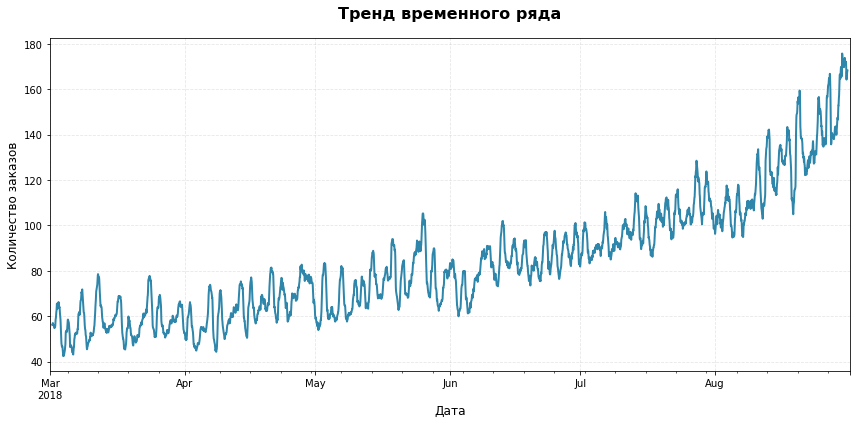

In [14]:
plt.figure(figsize=(12, 6))
decomposed.trend.plot(ax=plt.gca(), color='#2E86AB', linewidth=2)
plt.title('Тренд временного ряда', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

Действительно, тренд восходящий. Бывают просадки, но видно, что тренд растет. Предположение подтвердилось, к августу в среднем становилось все большее количество заказов.

Выбросы удалять не будем.

=======================

Тепер посмотрим как выглядит средний "типичный" день бизнеса.

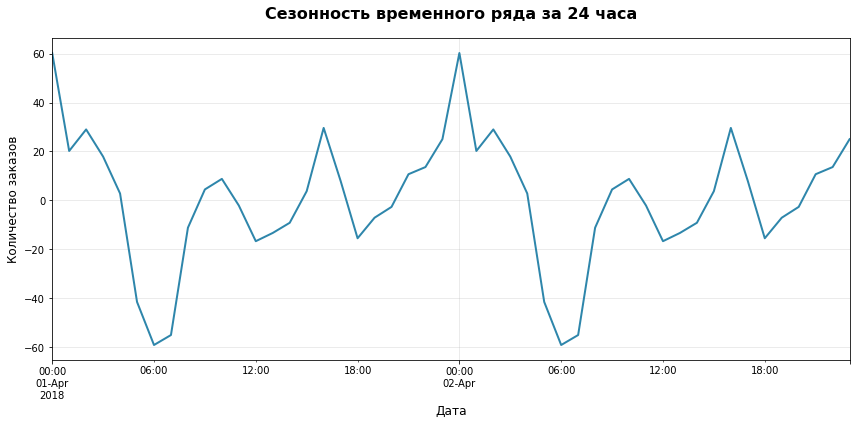

In [16]:
plt.figure(figsize=(12, 6))
decomposed.seasonal['2018-04-01':'2018-04-02'].plot(ax=plt.gca(), color='#2E86AB', linewidth=2)
plt.title('Сезонность временного ряда за 24 часа', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

В целом, данные выглядят логично:
* В 7:00-10:00 видим рост, люди едут на работу
* В 16:00 наблюдается пик, видимо, люди берут такси после работы
* Также наблюдается спрос ночью, в 23:00-1:00, скорее всего это связано с транспортной доступностью, так как ночью работает в основном только такси

=================

#### Анализ стационарности

Проанализируем ряд на стационарность.

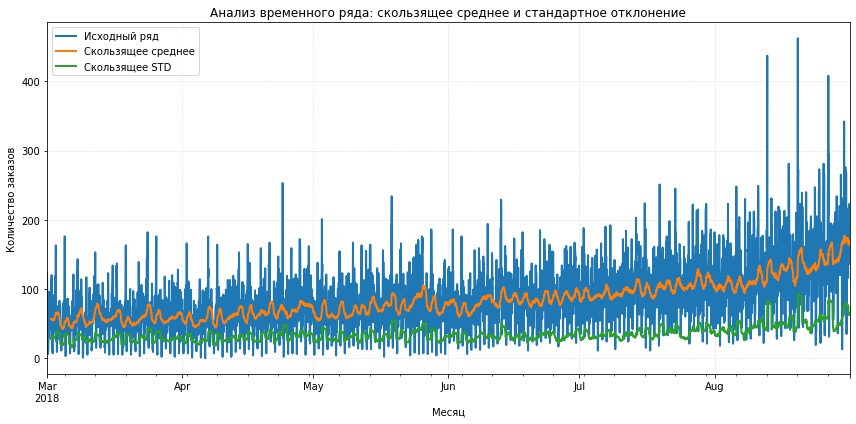

In [17]:
plt.figure(figsize=(12, 6))

df['mean'] = df['num_orders'].rolling(24).mean()
df['std'] = df['num_orders'].rolling(24).std()

df.plot(ax=plt.gca(), linewidth=2)

plt.title('Анализ временного ряда: скользящее среднее и стандартное отклонение')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.legend(['Исходный ряд', 'Скользящее среднее', 'Скользящее STD'])
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

Для определения стационарности ряда используем статистический тест Дики-Фулера с параметров значимости 5%.

In [18]:
result = adfuller(df['num_orders'])

print('p-value:', round(result[1], 4))

alpha = 0.05
if result[1] < alpha:
    print('Ряд стационарен (p-value < 0.05)')
else:
    print('Ряд нестационарен (p-value > 0.05)')

p-value: 0.0289
Ряд стационарен (p-value < 0.05)


Ряд стационарен, будем использовать его для прогнозирования.

#### **Вывод по исследовательскому анализу данных**

Данные в нашем датафрейме указаны с 1 марта 2018 года по 31 августа 2018 года.

Можно выделить такие статистики:
* Среднее количество заказов в час - 84
* Медианное количество заказов в час - 45
* Минимально возможное количество заказов в час - 0
* Максимально возможное количество заказов в час - 462

Чаще всего количество заказов в час составляет 60-100. 

Также в данных имелись значения, превышающие 250 заказов в час. Однако, большинство таких "выбросов" произошло в августе (последний месяц наблюдений), что оказывается не было случайностью. Анализ тренда показал, что каждый месяц среднее количество заказов не быстро, но растет. Поэтому было принято решение "выбросы" не удалять.

### Подготовка данных

#### Создание признаков

Для начала создадим дополнительные признаки, чтобы с их помощью модель могла улавливать скрытые закономерности в данных.

1. Календарные признаки. Во многих данных тренды и сезонность привязаны к конкретной дате.
2. «Отстающие значения». Предыдущие значения временного ряда подскажут, будет ли функция расти или уменьшаться.

=====================

Для начала удалим ранее посчитанные скользящее среднее и среднекрадратичное отклонение скользящего среднего, так как они в моменте времени `t` учитывают текущее значение ряда `x(t)`. Это некорректно, может привести к учетке данных.

In [19]:
df = df.drop(columns=['mean', 'std'])

In [20]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


А теперь создадим функцию по созданию признаков, которые перечислили раннее.

In [21]:
def make_features(data, max_lag, rolling_mean_size):
    data['weekday'] = data.index.weekday
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


make_features(df, 168, 168)
df.head()

,num_orders,weekday,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Далее сделаем:

1. Разобьем данные на входные признаки и целевой признак
2. Разобьем данные на тренировочную и тестовую выборки в соотношении 90%-10%

In [22]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()

X_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']

X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

print('Тренировочная выборка')
print(X_train.shape)
print(y_train.shape)
print('Тестовая выборка')
print(X_test.shape)
print(y_test.shape)

Тренировочная выборка
(3806, 171)
(3806,)
Тестовая выборка
(442, 171)
(442,)


In [23]:
X_train.head()

,weekday,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-08 00:00:00,3,0,94.0,127.0,108.0,76.0,50.0,99.0,48.0,46.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,54.226190
2018-03-08 01:00:00,3,1,143.0,94.0,127.0,108.0,76.0,50.0,99.0,48.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,54.339286
2018-03-08 02:00:00,3,2,78.0,143.0,94.0,127.0,108.0,76.0,50.0,99.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,54.297619
2018-03-08 03:00:00,3,3,65.0,78.0,143.0,94.0,127.0,108.0,76.0,50.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,54.261905
2018-03-08 04:00:00,3,4,68.0,65.0,78.0,143.0,94.0,127.0,108.0,76.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,54.273810


#### **Вывод по подготовке данных**

На этом этапе в данные были добавлены признаки:
* Номер дня
* Номер месяца
* Номер недели
* Час дня
* "Отстающие значения" (добавили 4 столбца)

Были удалены пропуски в данных.

Также, данные были разделены на целевой признак и входные признаки, и были разделены на тренировочную и тестовую выборки в соотношении 90%-10% соответственно.

### Обучение моделей

На этом этапе обучим 3 модели:
1. DummyRegressor
2. LinearRegression
3. CatBoostRegressor

 Алгоритм работы будет выглядеть так:
- оптимизация гиперпараметров и поиск лучшей модели с помощью кросс-валидации GridSearchCV;
- оценка метрики `RMSE`; 
- оценка метрики `RMSE` на тестовой выборке;

==================

Так как у нас временные ряды, будем использовать специальный для них кросс-валидатор, чтобы данные были разбиты на фолды без перемешивания.

In [24]:
# Создаем кросс-валидатор для временных рядов
tscv = TimeSeriesSplit(n_splits=5)

#### **Dummy Regressor**

DummyRegressor - константная модель. Обучим ее, чтобы убедиться, что остальные модели действительно находят закономерности в данных. 

In [25]:
model_dummy = DummyRegressor()

parameters_dummy = {
    'strategy': ['mean', 'median', 'constant'],
    'constant': [None, 0, y_train.mean()]
}

grid_search_dummy = GridSearchCV(
    model_dummy,
    parameters_dummy,
    cv=tscv, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_dummy.fit(X_train, y_train)

best_params_dummy = grid_search_dummy.best_params_
best_model_dummy = grid_search_dummy.best_estimator_

RMSE_train_dummy = -grid_search_dummy.best_score_
print('Лучшие параметры для DummyRegressor:', best_params_dummy)
print('RMSE на кросс-валидации:', RMSE_train_dummy)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Лучшие параметры для DummyRegressor: {'constant': 79.35286389910668, 'strategy': 'constant'}
RMSE на кросс-валидации: 38.42599854116817


In [26]:
y_pred_test = best_model_dummy.predict(X_test)

RMSE_test_Dummy = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE на тестовой выборке : {RMSE_test_Dummy:.4f}")

RMSE на тестовой выборке : 83.9794


In [27]:
X_test_copy = X_test.copy()
# берем предсказания за вчерашний день
pred_24h = X_test_copy.shift(24)

pred_24h_clean = pred_24h.dropna()
test_clean = X_test_copy.loc[pred_24h_clean.index]  

rmse_24h = np.sqrt(mean_squared_error(test_clean, pred_24h_clean))
print(f"RMSE на тестовой выборке: {rmse_24h:.4f}")

RMSE на тестовой выборке: 55.7208


#### **LinearRegression**

Сначала масштабируем количественные признаки с помощью StandardScaler() и закодируем признаки **weekday** и **hour** с помощью OneHotEncoder:

In [28]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

num_columns = X_train_copy.select_dtypes(include='number').columns.tolist()
ohe_columns = ['weekday', 'hour']

num_columns = [col for col in num_columns if col not in ohe_columns]

data_preprocessor = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ohe_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', LinearRegression())
])

parameters_lr = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False]
}

In [29]:
grid_search_lr = GridSearchCV(
    pipeline,
    parameters_lr,
    cv=tscv, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X_train_copy, y_train)

best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

RMSE_train_LR = -grid_search_lr.best_score_
print('Лучшие параметры для LinearRegression:', best_params_lr)
print('RMSE на кросс-валидации:', RMSE_train_LR)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Лучшие параметры для LinearRegression: {'model__copy_X': True, 'model__fit_intercept': True}
RMSE на кросс-валидации: 23.074860919800276


#### **CatBoostRegressor**

In [33]:
model_catboost = CatBoostRegressor(
    random_seed=42,
    verbose=0,
    thread_count=-1)

parameters_catboost = {
    'n_estimators': [50, 100],
    'depth': [4, 5, 10]
}

grid_search_catboost = GridSearchCV(
    model_catboost,
    parameters_catboost,
    cv=tscv,  
    scoring='neg_root_mean_squared_error',
    n_jobs=1, 
    verbose=0
)


grid_search_catboost.fit(X_train, y_train)


best_params_catboost = grid_search_catboost.best_params_
best_model_catboost = grid_search_catboost.best_estimator_

RMSE_train_CatBoost = -grid_search_catboost.best_score_

print('Лучшие параметры для CatBoostRegressor:', best_params_catboost)
print('RMSE на кросс-валидации:', RMSE_train_CatBoost)

Лучшие параметры для CatBoostRegressor: {'depth': 4, 'n_estimators': 100}
RMSE на кросс-валидации: 23.476901956401854


#### Сравнение моделей

In [35]:
columns = ['Model', 'CV RMSE']
rows = [['CatBoost', round(RMSE_train_CatBoost, 2)],
        ['LinearRegression', round(RMSE_train_LR, 2)],
        ['DummyRegressor', round(RMSE_train_dummy, 2)]]
RMSE_df = pd.DataFrame(columns=columns, data=rows)

In [36]:
RMSE_df

,Model,CV RMSE
0,CatBoost,23.48
1,LinearRegression,23.07
2,DummyRegressor,38.43


Самой лучшей моделью оказалась модель линейной регрессии **LinearRegression**.

Теперь посмотрим, какая метрика получится у нашей лучшей модели на тестовой выборке.

In [37]:
y_pred_lr = best_model_lr.predict(X_test_copy)

RMSE_test_LR = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"RMSE на тестовой выборке : {RMSE_test_LR:.4f}")

RMSE на тестовой выборке : 34.1819


Прежде чем окончательно дать ответ, что лучшей модели можно доверять, посмотрим на анализ остатков модели LinearRegression:

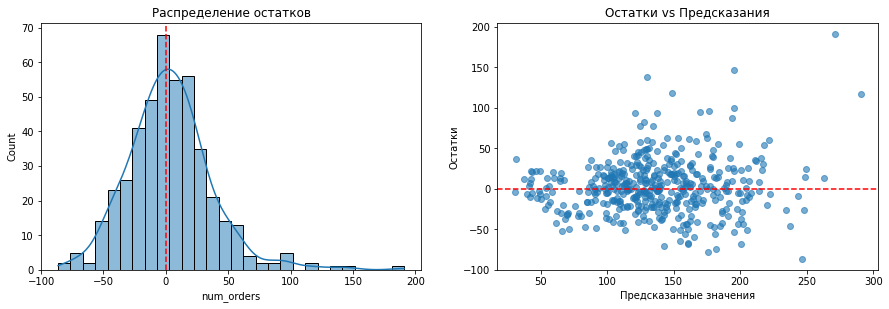

In [38]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(15, 10))

# 1. Распределение остатков
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков')
plt.axvline(0, color='r', linestyle='--')

# 2. Остатки vs Предсказания
plt.subplot(2, 2, 2)
plt.scatter(y_pred_lr, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказания');



Не наблюдается смещения относительно нуля, однако в распределении присутсвуют выбросы, что обуславливается изменением тренда заказов такси. Анализ диспресии показывает, что разброс почти постоянен, однако все равно наблюдаются выбросы. 

На основании анализа остаткой можно заключить, что модель достаточно хороша для краткосрочных прогнозов. Наличие выбросов показывает, что с течением времени ее точность будет снижаться. Модель требует регулярного планового переобучения.

### Вывод

**Цель проекта** была достигнута: разработана модель машинного обучения для предсказания количества заказов такси на следующий час.

**1. Анализ и предобработка данных**

Данные в нашем датафрейме указаны с 1 марта 2018 года по 31 августа 2018 года.

Можно выделить такие статистики:
* Среднее количество заказов в час - 84
* Медианное количество заказов в час - 45
* Минимально возможное количество заказов в час - 0
* Максимально возможное количество заказов в час - 462

Чаще всего количество заказов в час составляет 60-100. 

Также в данных имелись значения, превышающие 250 заказов в час. Однако, большинство таких "выбросов" произошло в августе (последний месяц наблюдений), что оказывается не было случайностью. Анализ тренда показал, что каждый месяц среднее количество заказов не быстро, но растет. Поэтому было принято решение "выбросы" не удалять.

**2. Выбор и оценка моделей**

Было 3 кандидата:

* **DummyRegressor**: эту модель использовали, чтобы убедиться, что остальные модели находят закономерности в данных. То есть метрика качества других моделей не должна быть хуже метрики, которую выдает DummyRegressor.
* **LinearRegression**: Выступила в качестве простой и интерпретируемой линейной модели. Ее результаты более уступили сложным алгоритмам, что подтвердило наличие нелинейных зависимостей в данных.
* **CatBoostRegressor**: Сложный алгоритм градиентного бустинга, показавший наивысшее качество предсказания. Гиперпараметры были настроены с помощью GridSearchCV, что позволило максимально раскрыть потенциал на предоставленных данных.

**3. Результаты и выбор финальной модели**

Наиболее подходящей оказалась модель **LinearRegression**

Она оказалась самой точной по предказанию моделью.

Лучшая модель, которая будет рекомендована заказчику:

In [39]:
best_model_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weekday', 'hour']),
                                                 ('num', StandardScaler(),
                                                  ['lag_1', 'lag_2', 'lag_3',
                                                   'lag_4', 'lag_5', 'lag_6',
                                                   'lag_7', 'lag_8', 'lag_9',
                                                   'lag_10', 'lag_11', 'lag_12',
                                                   'lag_13', 'lag_14', 'lag_15',
                                                   'lag_16', 'lag_17', 'lag_18',
                                                   'lag_19', 'lag_20', 'lag_21',
                                                   'lag_22', 'lag_23', 'lag_24',
                                                   'lag_25', 'lag_26', 'lag_27',
                                                   'lag_28', 'lag_29', 'lag_30', ...])])),
                ('model', LinearRegression())])